# Rainfall Prediction-Weather Forecasting

Importing All the necessary Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset from github

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


we have 8425 rows and 23 columns

From the problem statement we have to make two predicitions 

1)forecast whether or not it will rain tomorrow, hence for this our target variable is RainTomorrow which has binary data and we will have to apply classification algorithms for this

2)predict how much rainfall could be there, hence for this our target variable is Rainfall which has continuous data and we will have to apply regression algorithms for this

We have a mix of categorical and numerical columns which will have to be taken care of

# EDA

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(df.shape[0], df.shape[1]))

We had 8425 Rows and 23 Columns before dropping duplicates.
We have 6762 Rows and 23 Columns after dropping duplicates.


the drop_duplicates function is used to remove duplicates, it seems like we had a lot of duplicate rows

Now lets us have a look at our columns

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

we have 23 columns in our data set . we will have to split the Date column into individual day, month and year columns.
The other columns contain information relating to the Location, Temperature, Evaporation, Sunshine,Wind,Pressure, Humidity,Rain

# Checking Null Values

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

we have null values present in 21 columns. Evaporation and sunshine contains a lot of null values.

let us check the null values visually to see them better

<AxesSubplot:>

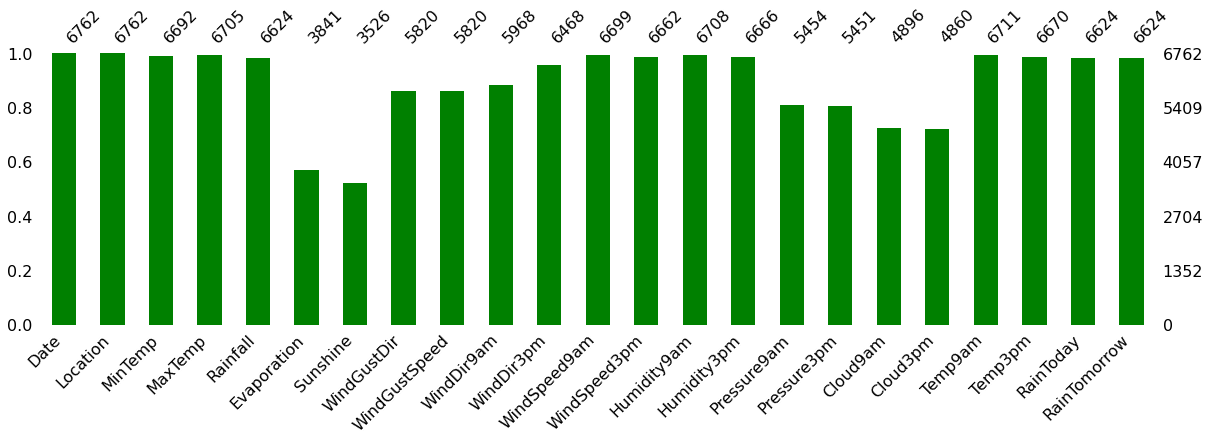

In [7]:
import missingno
missingno.bar(df, figsize = (20,5), color="green")

we can see sunshine evaporation contains a lot of null values, pressure9am,pressure3pm,clouds9am,clouds30pm also contains quite a few null values

In [8]:
print("Missing values in percentage:\n")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing values in percentage:

Date : 0.0 %
Location : 0.0 %
MinTemp : 1.035 %
MaxTemp : 0.843 %
Rainfall : 2.041 %
Evaporation : 43.197 %
Sunshine : 47.856 %
WindGustDir : 13.931 %
WindGustSpeed : 13.931 %
WindDir9am : 11.742 %
WindDir3pm : 4.348 %
WindSpeed9am : 0.932 %
WindSpeed3pm : 1.479 %
Humidity9am : 0.799 %
Humidity3pm : 1.42 %
Pressure9am : 19.343 %
Pressure3pm : 19.388 %
Cloud9am : 27.595 %
Cloud3pm : 28.128 %
Temp9am : 0.754 %
Temp3pm : 1.361 %
RainToday : 2.041 %
RainTomorrow : 2.041 %


Since evaporation and sunshine have almost half of the data filled with missing values it is best to drop them as it is not contibuting a lot in the prediction of our model

In [9]:
df.drop(['Evaporation','Sunshine'],axis=1,inplace=True)

# DataFrame Description

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6692.0,13.109145,5.569574,-2.0,9.0,13.2,17.5,28.5
MaxTemp,6705.0,24.098345,6.156128,8.2,19.5,23.5,28.4,45.5
Rainfall,6624.0,2.780148,10.591418,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,5820.0,38.977663,14.418577,7.0,30.0,37.0,48.0,107.0
WindSpeed9am,6699.0,12.782206,9.833499,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6662.0,17.571150,9.620043,0.0,9.0,17.0,24.0,83.0
Humidity9am,6708.0,67.506559,17.251733,10.0,56.0,68.0,81.0,100.0
Humidity3pm,6666.0,50.467147,18.631086,6.0,38.0,50.0,63.0,99.0
Pressure9am,5454.0,1017.626311,6.712043,989.8,1013.1,1017.6,1022.2,1039.0
Pressure3pm,5451.0,1015.119923,6.646755,982.9,1010.3,1015.1,1019.6,1036.0


the describe function describes only the numerical data.

We can see with count and confirm that there are missing values. We can see that some outliers are also present based on the difference between the different quartiles and the max values

Now let us describe the dataFrame Visually

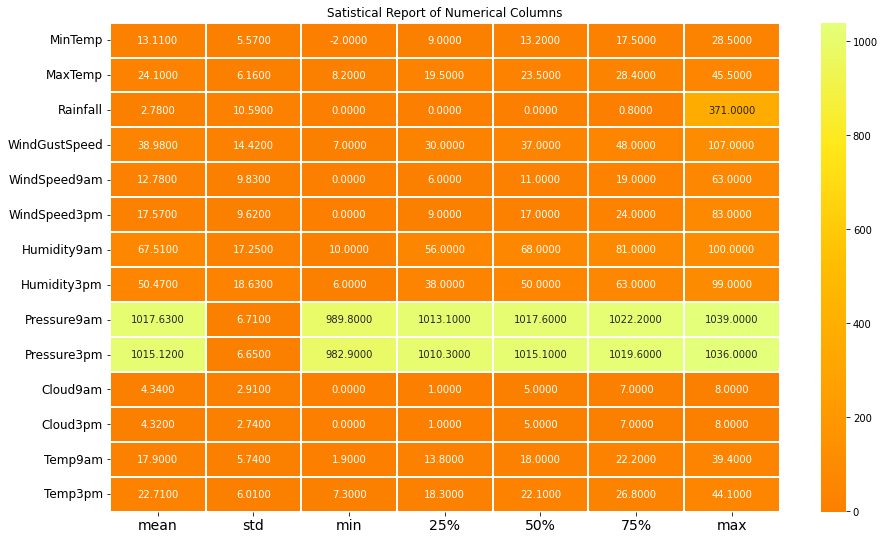

In [11]:
plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="Wistia_r")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

we can see that the columns Pressure9am and pressure 3pm columns stand out . They have Higher values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   WindGustDir    5820 non-null   object 
 6   WindGustSpeed  5820 non-null   float64
 7   WindDir9am     5968 non-null   object 
 8   WindDir3pm     6468 non-null   object 
 9   WindSpeed9am   6699 non-null   float64
 10  WindSpeed3pm   6662 non-null   float64
 11  Humidity9am    6708 non-null   float64
 12  Humidity3pm    6666 non-null   float64
 13  Pressure9am    5454 non-null   float64
 14  Pressure3pm    5451 non-null   float64
 15  Cloud9am       4896 non-null   float64
 16  Cloud3pm       4860 non-null   float64
 17  Temp9am        6711 non-null   float64
 18  Temp3pm 

we can see that some of the columns are of object datatype which will have to be changed to numerical data in order for the machine to understand it

In [13]:
df.info

<bound method DataFrame.info of             Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0     2008-12-01   Albury     13.4     22.9       0.6           W   
1     2008-12-02   Albury      7.4     25.1       0.0         WNW   
2     2008-12-03   Albury     12.9     25.7       0.0         WSW   
3     2008-12-04   Albury      9.2     28.0       0.0          NE   
4     2008-12-05   Albury     17.5     32.3       1.0           W   
...          ...      ...      ...      ...       ...         ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0           E   
8421  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
8422  2017-06-23    Uluru      5.4     26.9       0.0           N   
8423  2017-06-24    Uluru      7.8     27.0       0.0          SE   
8424  2017-06-25    Uluru     14.9      NaN       0.0         NaN   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0              44.0          W        WNW          20.0          2

# Checking Unique Values

In [14]:
df.nunique().to_frame('Unique Values')

,Unique Values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
WindGustDir,16
WindGustSpeed,52
WindDir9am,16
WindDir3pm,16
WindSpeed9am,34


we can see the different unique values and we are good to go

# Data Pre Processing

# Filling Missing Data

In [15]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [16]:
df['MinTemp']=df['MinTemp'].fillna(np.mean(df['MinTemp']))
df['MaxTemp']=df['MaxTemp'].fillna(np.mean(df['MaxTemp']))
df['Rainfall']=df['Rainfall'].fillna(np.mean(df['Rainfall']))
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(np.mean(df['WindGustSpeed']))
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(np.mean(df['WindSpeed9am']))
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(np.mean(df['WindSpeed3pm']))
df['Humidity9am']=df['Humidity9am'].fillna(np.mean(df['Humidity9am']))
df['Humidity3pm']=df['Humidity3pm'].fillna(np.mean(df['Humidity3pm']))
df['Pressure9am']=df['Pressure9am'].fillna(np.mean(df['Pressure9am']))
df['Pressure3pm']=df['Pressure3pm'].fillna(np.mean(df['Pressure3pm']))
df['Cloud9am']=df['Cloud9am'].fillna(np.mean(df['Cloud9am']))
df['Cloud3pm']=df['Cloud3pm'].fillna(np.mean(df['Cloud3pm']))
df['Temp9am']=df['Temp9am'].fillna(np.mean(df['Temp9am']))
df['Temp3pm']=df['Temp3pm'].fillna(np.mean(df['Temp3pm']))
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

we have successfully filled all the missing values

Splitting date column into seperate day, month and year columns

In [18]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [19]:
df.shape

(6762, 23)

we now have 23 columns

# Visualization

Let us make a list of all columns

In [20]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [21]:
col= ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']
print(col)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']


Countplot for categorical data

Countplot for Location column:->


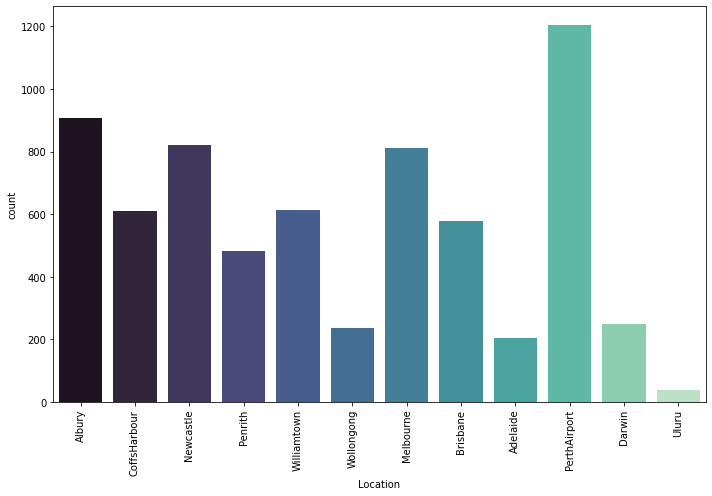

Countplot for WindGustDir column:->


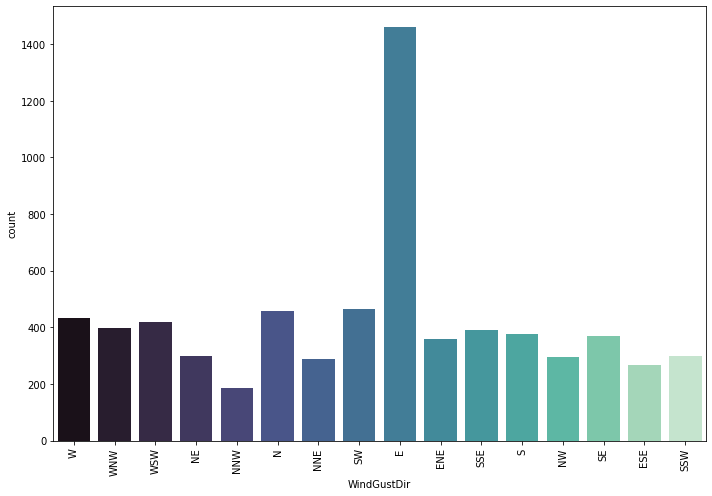

Countplot for WindDir9am column:->


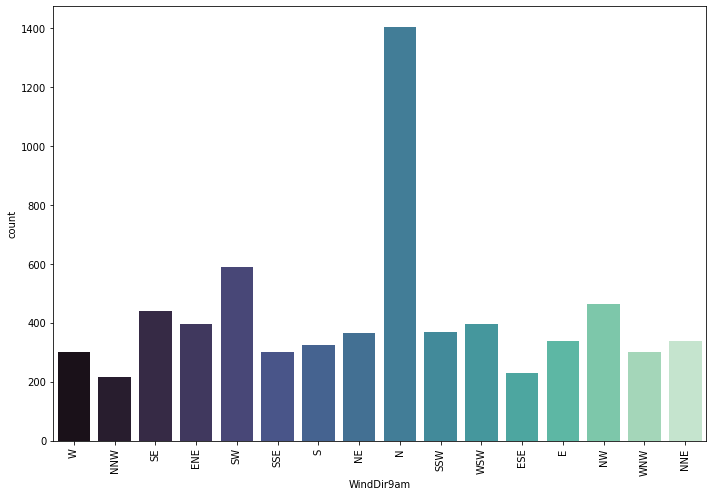

Countplot for WindDir3pm column:->


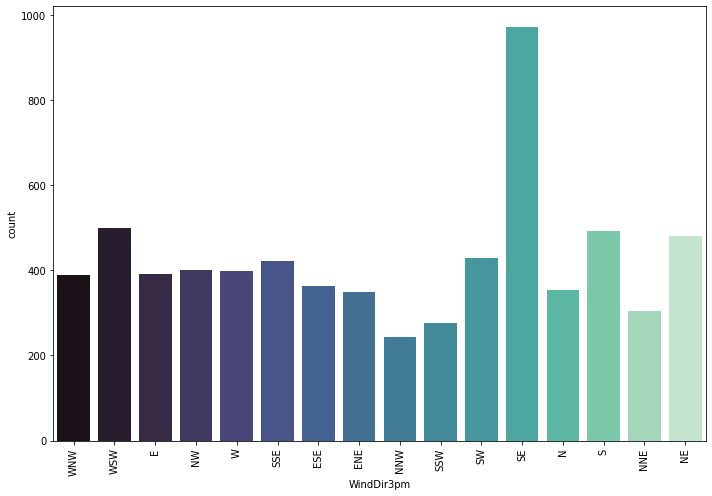

Countplot for RainToday column:->


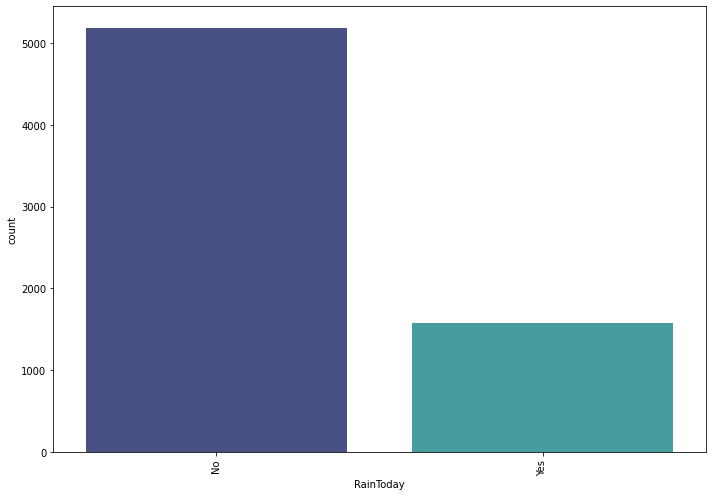

Countplot for RainTomorrow column:->


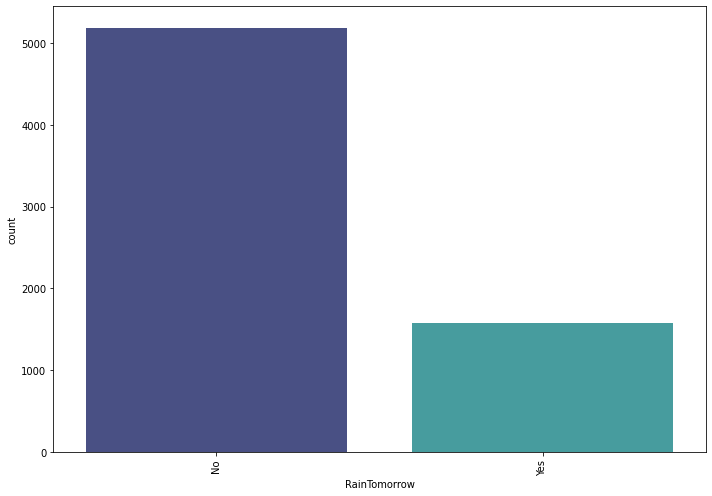

In [22]:
def count_plot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x,palette='mako')
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

obj_col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for i in df[obj_col]:
    print("Countplot for {} column:->".format(i))
    count_plot(df[i])

The weather station in PerthAirport receives the maximum rainfull according to our count plot and then albury. The least rainfull received is in Uluru

we can see that the strongest wind gust blows in the East direction and least in the NNW direction

we can see that the wind blows the most in north direction at 9am and least in teh East South East direction

At 3pm the wind blows the least in North North West NWW direction and most in the South East direction

we observe that the no rain today is greater than it rained today

We can see that most of the data is coeverd by it will not rain tomorrow and lesser yes it will rain tomorrow, since this is one of our target variable we will have to take care of class imbalance using SMOTE



Scatter plot for continuous columns

In [23]:
num_col = [x for x in col if x not in obj_col]
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


Scatter plot for MinTemp column with respect to the rows covered ->


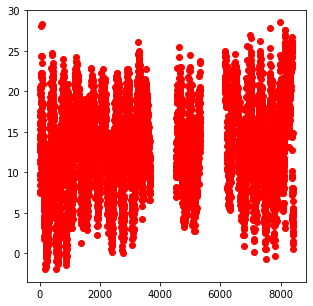

Scatter plot for MaxTemp column with respect to the rows covered ->


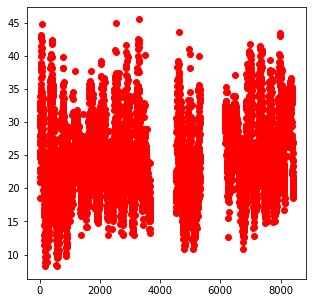

Scatter plot for Rainfall column with respect to the rows covered ->


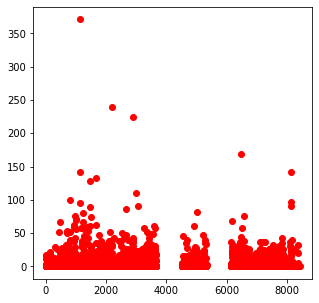

Scatter plot for WindGustSpeed column with respect to the rows covered ->


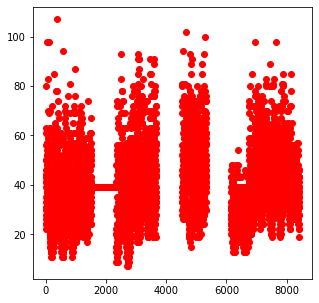

Scatter plot for WindSpeed9am column with respect to the rows covered ->


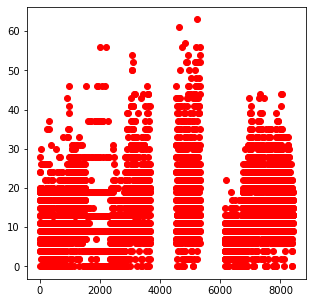

Scatter plot for WindSpeed3pm column with respect to the rows covered ->


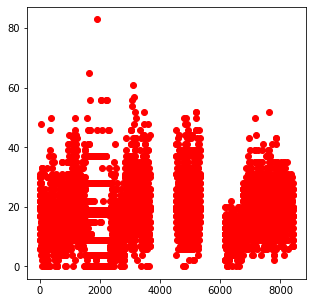

Scatter plot for Humidity9am column with respect to the rows covered ->


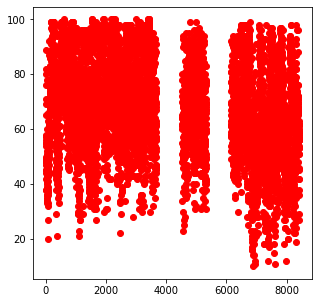

Scatter plot for Humidity3pm column with respect to the rows covered ->


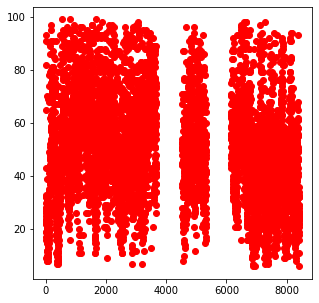

Scatter plot for Pressure9am column with respect to the rows covered ->


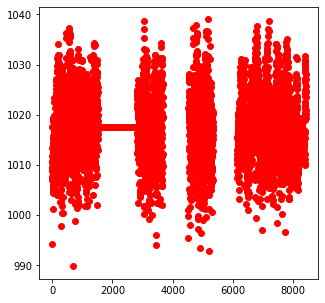

Scatter plot for Pressure3pm column with respect to the rows covered ->


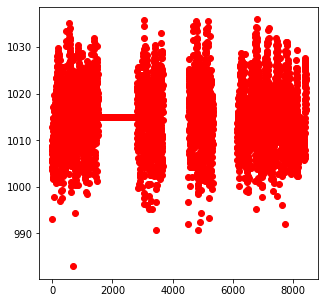

Scatter plot for Cloud9am column with respect to the rows covered ->


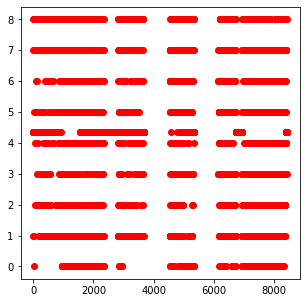

Scatter plot for Cloud3pm column with respect to the rows covered ->


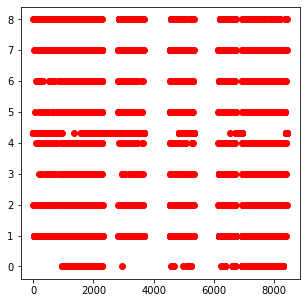

Scatter plot for Temp9am column with respect to the rows covered ->


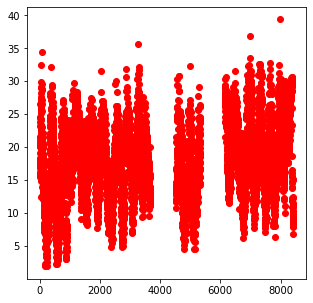

Scatter plot for Temp3pm column with respect to the rows covered ->


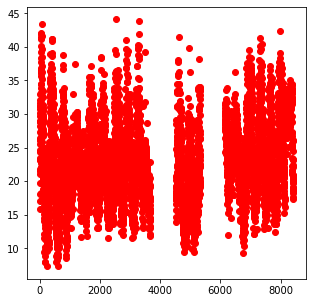

Scatter plot for Day column with respect to the rows covered ->


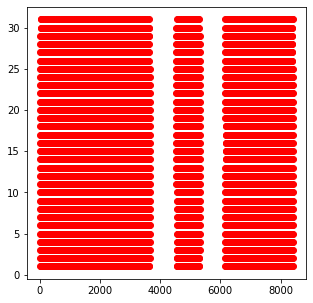

Scatter plot for Month column with respect to the rows covered ->


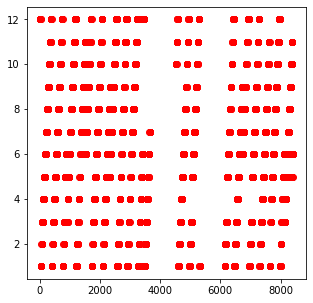

Scatter plot for Year column with respect to the rows covered ->


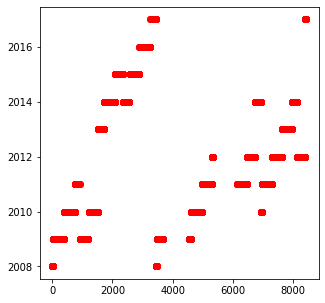

In [24]:
for j in df[num_col]:
    plt.figure(figsize=(5,5))
    print(f"Scatter plot for {j} column with respect to the rows covered ->")
    plt.scatter(df.index, df[j],color='red')
    plt.show()


we can see that there is a gap maxtemp at values 4000 and 6000

we can see that some outliers are present in rainfall and the rainfall is distributed mostly in the rows 0-50

we can see that the data for windgust speed is not unifromly distributed and there is no pattern

Windspeed 9am is not unifromly distributed and we can see a few outliers are also present and there is no pattern

windspeed 3pm column is also not unidrmly distributed and therre is no pattern

The humidity9am column is somewhat unofrmly distributed but there is a break in the humidty9am values at 4000 and 6000

The humidity3pm column is somewhat unofrmly distributed but there is a break in the humidty9am values at 4000 and 6000

The pressure9am column is uniformly dsitributed for the rows but there are breaks in the pressure 9am at values 2000,4000,6000 . we can also see some outliers are present

The pressure3pm column is uniformly dsitributed for the rows but there are breaks in the pressure 3pm at values 2000,4000,6000 . we can also see some outliers are present

We see that clouds at 3pm are distrbiuted throughout

we observe that the temp 9am is almost unifromly distributed but there is a gap at values 4000 and 6000. We can also see some outliers are present

we observe that the temp 3pm is almost unifromly distributed but there is a gap at values 4000 and 6000. We can also see some outliers are present

LinePlot

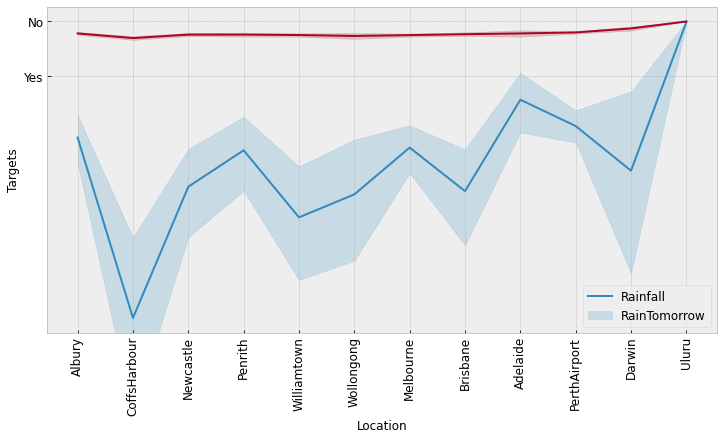

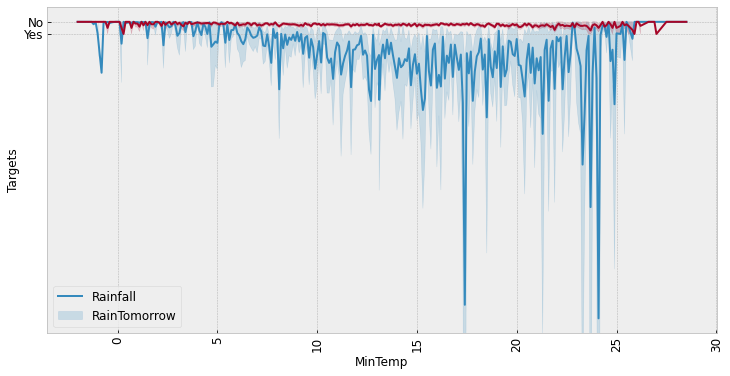

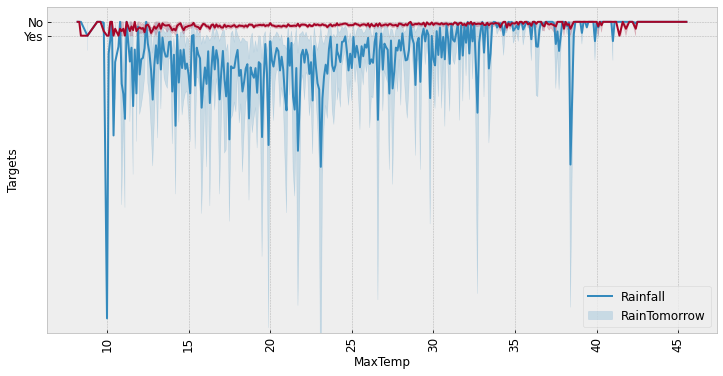

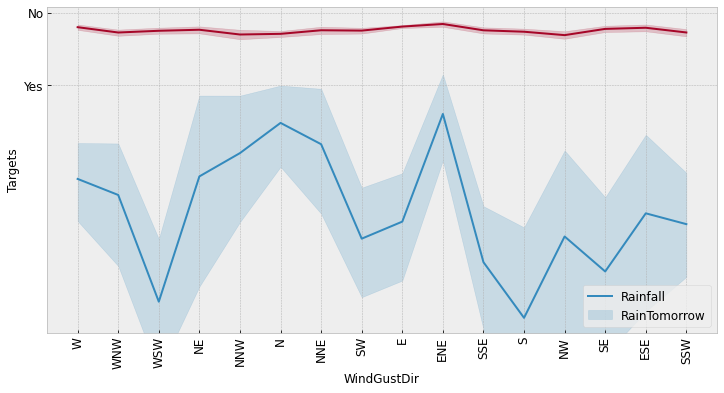

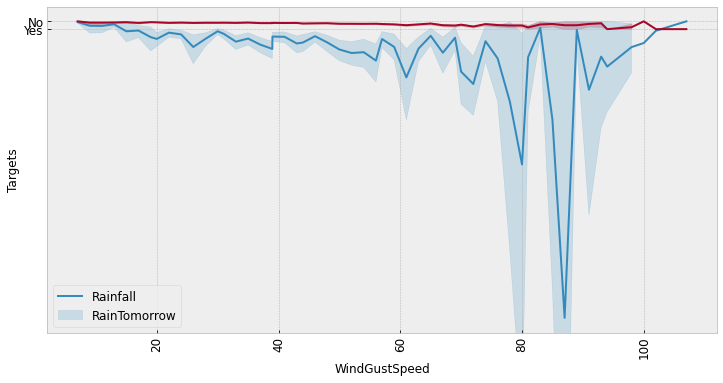

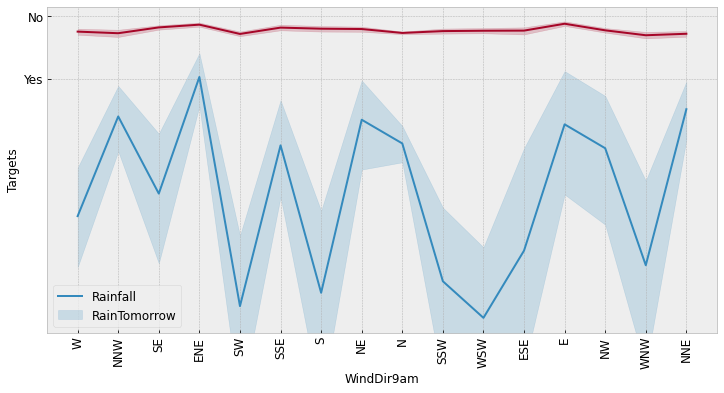

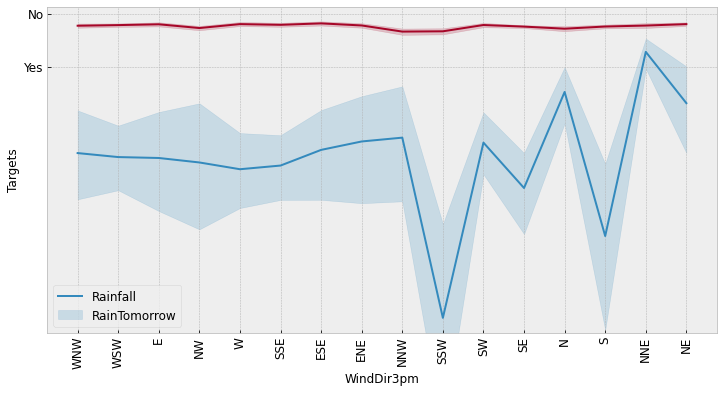

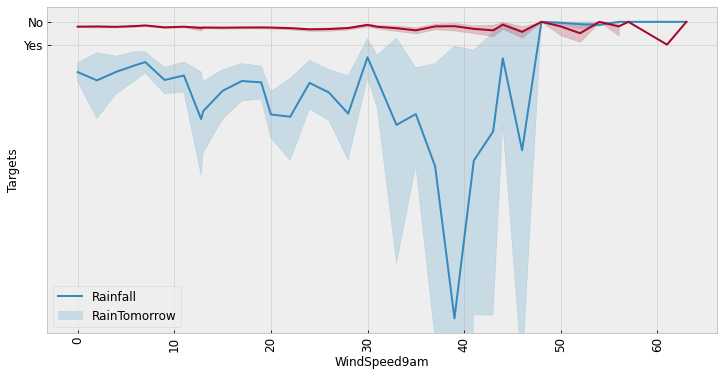

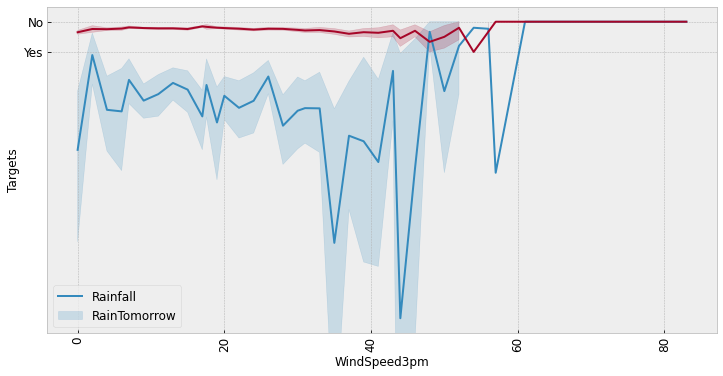

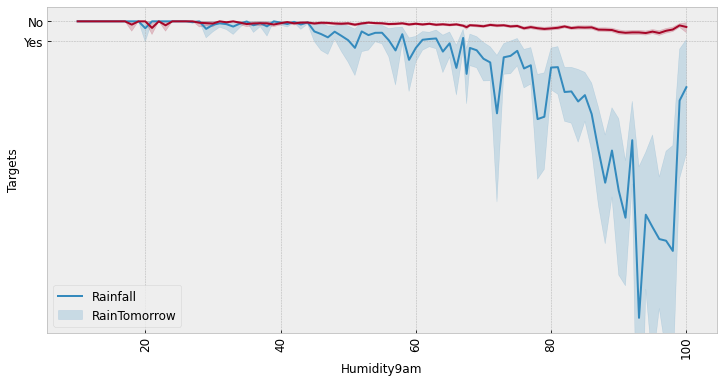

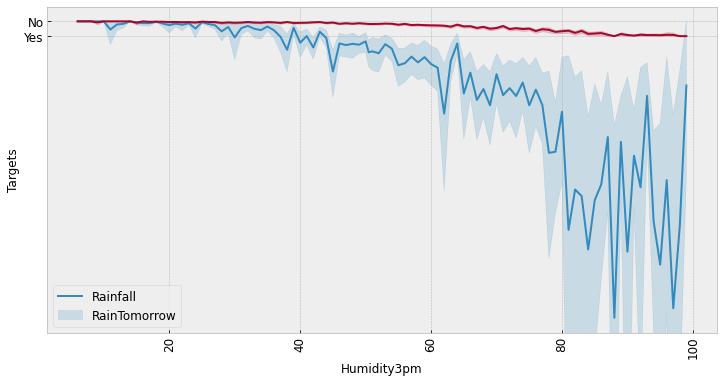

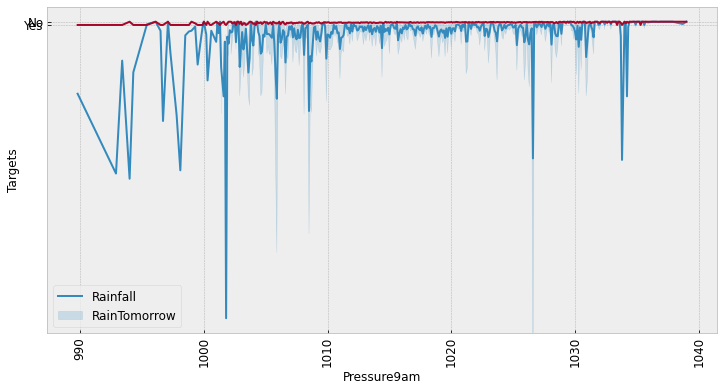

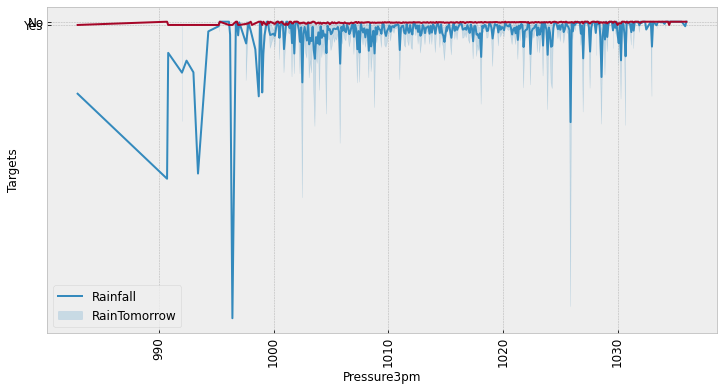

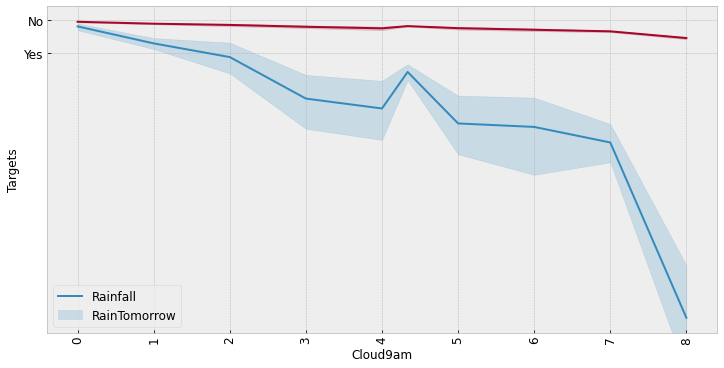

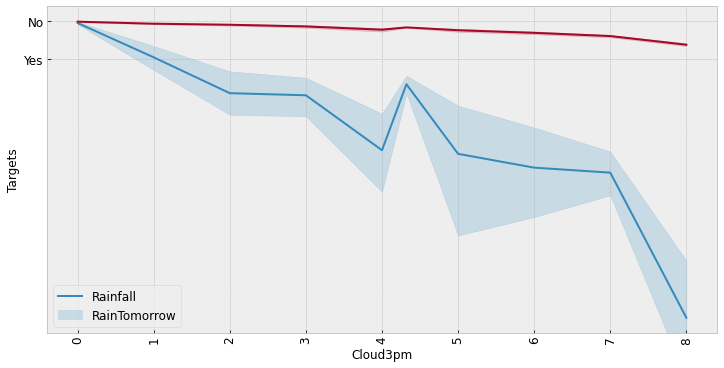

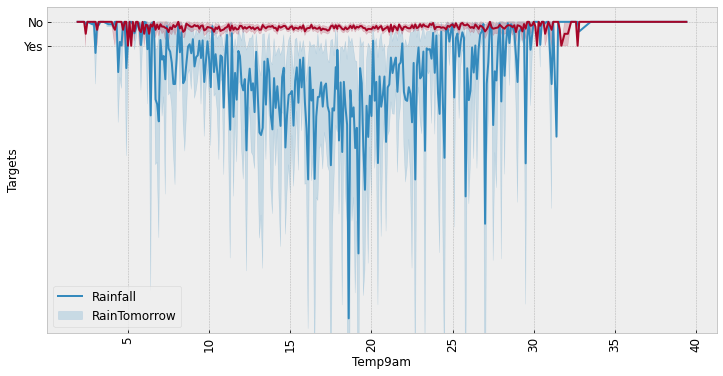

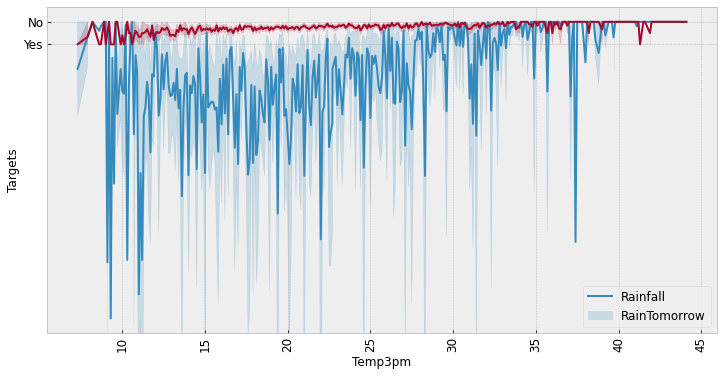

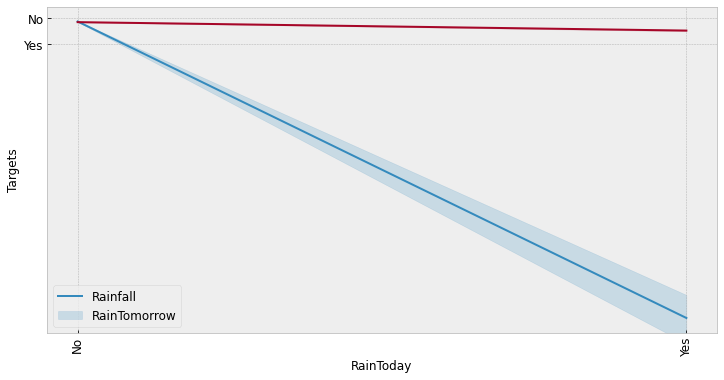

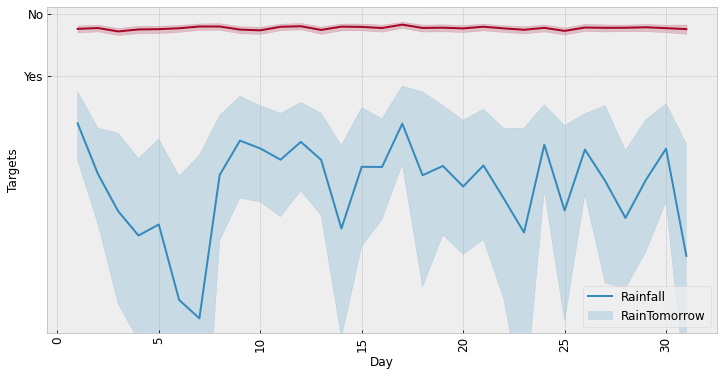

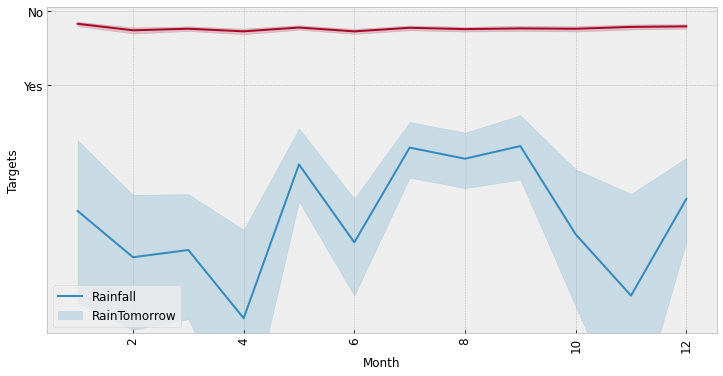

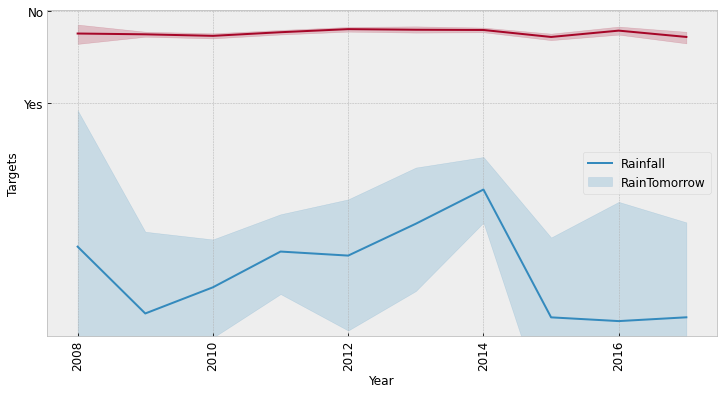

In [25]:
feature_columns = ['Location', 'MinTemp', 'MaxTemp', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'Day', 'Month', 'Year']

target_columns = ['Rainfall', 'RainTomorrow']

plt.style.use('bmh')

for z in df[feature_columns]:
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df[z], y=target_columns[0], data=df)
    sns.lineplot(x=df[z], y=target_columns[1], data=df)
    plt.ylabel("Targets")
    plt.xticks(rotation=90)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['Rainfall', 'RainTomorrow'], fontsize=12)
    plt.show()

i have successfully plotted our feature columns with the two target columns  and we can clearly see the distribution and pttern of these features

# Encoding

Now let us covert our categorical independent variables datatype to int using ordinal encoder

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.900000,0.6,13.0,44.000000,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.100000,0.0,14.0,44.000000,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.700000,0.0,15.0,46.000000,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.000000,0.0,4.0,24.000000,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.300000,1.0,13.0,41.000000,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,0.0,31.000000,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0.0,0.0,21,6,2017
8421,9.0,3.6,25.300000,0.0,6.0,22.000000,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0.0,0.0,22,6,2017
8422,9.0,5.4,26.900000,0.0,3.0,37.000000,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0.0,0.0,23,6,2017
8423,9.0,7.8,27.000000,0.0,9.0,28.000000,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24,6,2017


In [27]:
df.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Day                int64
Month              int64
Year               int64
dtype: object

we can see that all columns have been converted to numerical datatype

# Normal Distribution Curve

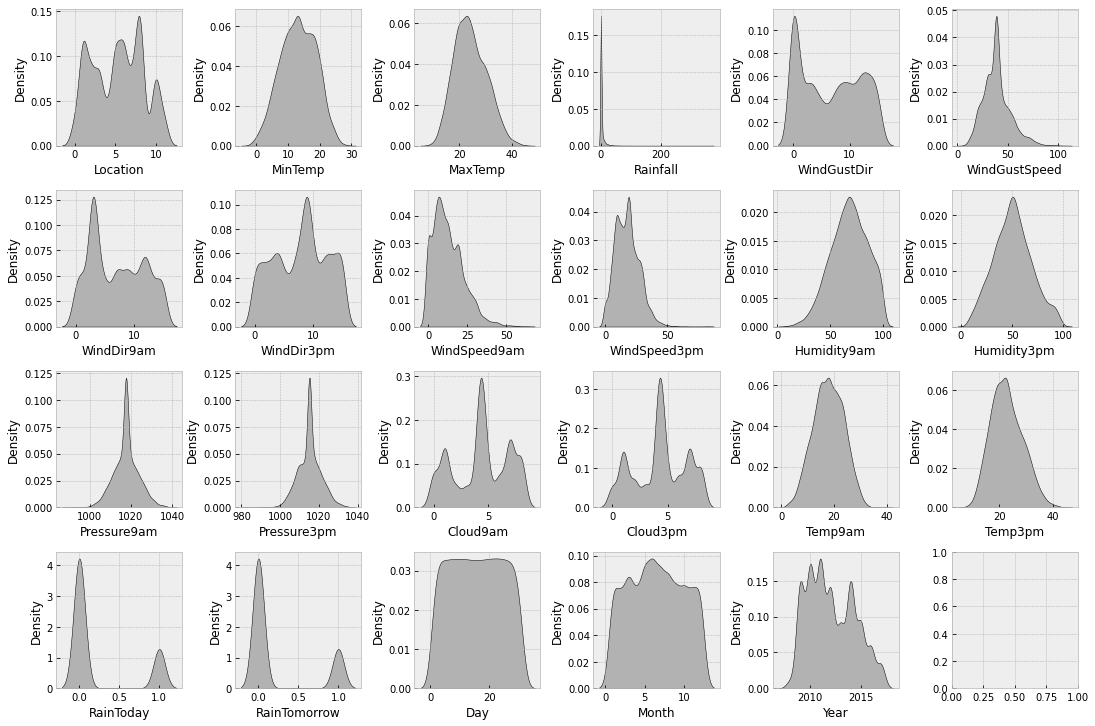

In [28]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="black", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see that skewness is present in some of the columns

In [29]:
df.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
RainToday         1.266937
RainTomorrow      1.266937
Day               0.006240
Month             0.021988
Year              0.354481
dtype: float64

if we take the skewness range as (-1,1) the the rainfall column is highly skewed. There is skewness present in Rain Today and Rain Tomorrow column

# BoxPlot

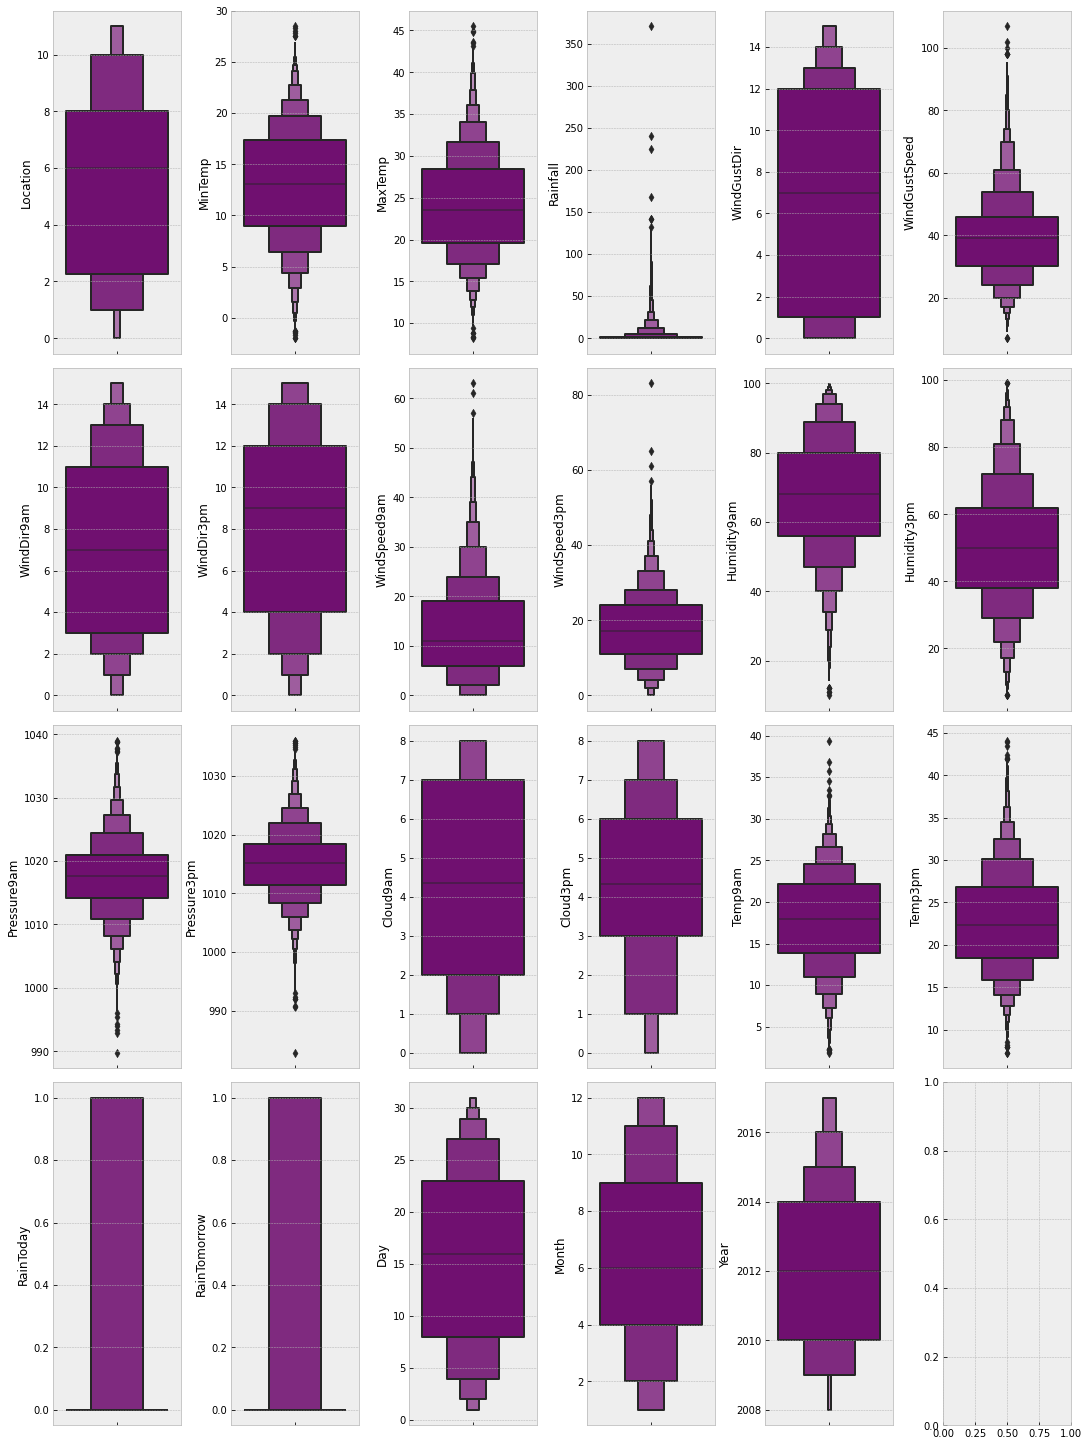

In [30]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


we can see the presence of outliers in some of the columns which will need to be taken care of using z score method

# Using Z Score to remove outliers

In [31]:
df.shape

(6762, 23)

In [119]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=2.5
np.where(z>2.5)

(array([  12,   12,   13,   37,   44,   44,   50,   50,   52,   52,   52,
          58,   58,   59,   59,   60,   60,   61,   61,   62,   62,   62,
          62,   66,   66,   67,   67,   68,   68,   69,   69,   69,   69,
          69,  123,  168,  170,  178,  181,  182,  183,  184,  184,  185,
         187,  192,  192,  192,  193,  193,  193,  196,  198,  199,  200,
         217,  218,  218,  219,  219,  220,  221,  229,  229,  236,  237,
         238,  250,  251,  251,  271,  295,  296,  315,  316,  316,  317,
         353,  353,  356,  363,  381,  381,  381,  388,  404,  404,  405,
         405,  406,  406,  407,  407,  417,  417,  431,  462,  465,  466,
         466,  467,  467,  515,  523,  530,  531,  535,  540,  542,  547,
         548,  552,  555,  558,  559,  559,  559,  560,  560,  560,  560,
         561,  561,  563,  567,  567,  568,  568,  569,  569,  573,  574,
         574,  577,  578,  579,  580,  580,  581,  583,  584,  588,  592,
         593,  596,  597,  598,  598, 

Setting the value of threshold as 3

In [120]:
df_new_z=df[(z<2.5).all(axis=1)]
df_new_z

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.900000,0.385265,13.0,3.806662,13.0,14.0,3.044522,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.100000,0.000000,14.0,3.806662,6.0,15.0,1.609438,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.700000,0.000000,15.0,3.850148,13.0,15.0,2.995732,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.000000,0.000000,4.0,3.218876,9.0,0.0,2.484907,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.300000,0.526589,13.0,3.737670,1.0,7.0,2.079442,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.000000,0.0,3.465736,9.0,1.0,2.639057,11.0,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0.0,0.0,21,6,2017
8421,9.0,3.6,25.300000,0.000000,6.0,3.135494,9.0,3.0,2.639057,9.0,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0.0,0.0,22,6,2017
8422,9.0,5.4,26.900000,0.000000,3.0,3.637586,9.0,14.0,2.302585,9.0,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0.0,0.0,23,6,2017
8423,9.0,7.8,27.000000,0.000000,9.0,3.367296,10.0,3.0,2.639057,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24,6,2017


# Percentage Data Loss

In [121]:
Data_loss=((6762-6140)/6762)*100
print(Data_loss,'%')

9.19846199349305 %


the percentage data loss is not much Therefore we can proceed with this DataFrame

# Handling Skweness Using Log Transform

In [109]:
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.327598
Rainfall         1.865886
WindGustDir      0.105287
WindGustSpeed   -0.422156
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am    -1.039103
WindSpeed3pm     0.549797
Humidity9am     -0.256177
Humidity3pm      0.150860
Pressure9am      0.022085
Pressure3pm      0.042990
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.047213
Temp3pm          0.348100
RainToday        1.266937
RainTomorrow     1.266937
Day              0.006240
Month            0.021988
Year             0.354481
dtype: float64

if we take the skewness range as (-1,1) the the rainfall column is highly skewed. There is skewness present in Rain Today and Rain Tomorrow column

# Applying Log Transform

In [110]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df_new_z.skew()

Location         0.033204
MinTemp         -0.008638
MaxTemp          0.063742
Rainfall         1.882829
WindGustDir      0.016418
WindGustSpeed   -0.177919
WindDir9am      -0.052687
WindDir3pm      -0.112733
WindSpeed9am    -0.270397
WindSpeed3pm     0.104920
Humidity9am      0.083271
Humidity3pm      0.145189
Pressure9am     -0.010803
Pressure3pm      0.022010
Cloud9am        -0.110207
Cloud3pm        -0.099370
Temp9am         -0.075362
Temp3pm          0.086008
RainToday        1.815037
RainTomorrow     1.658002
Day              0.019480
Month           -0.034531
Year             0.340439
dtype: float64

we have been able to reduce the skewness of rainfall column, which could create a problem in our model building as it was one of our target variable

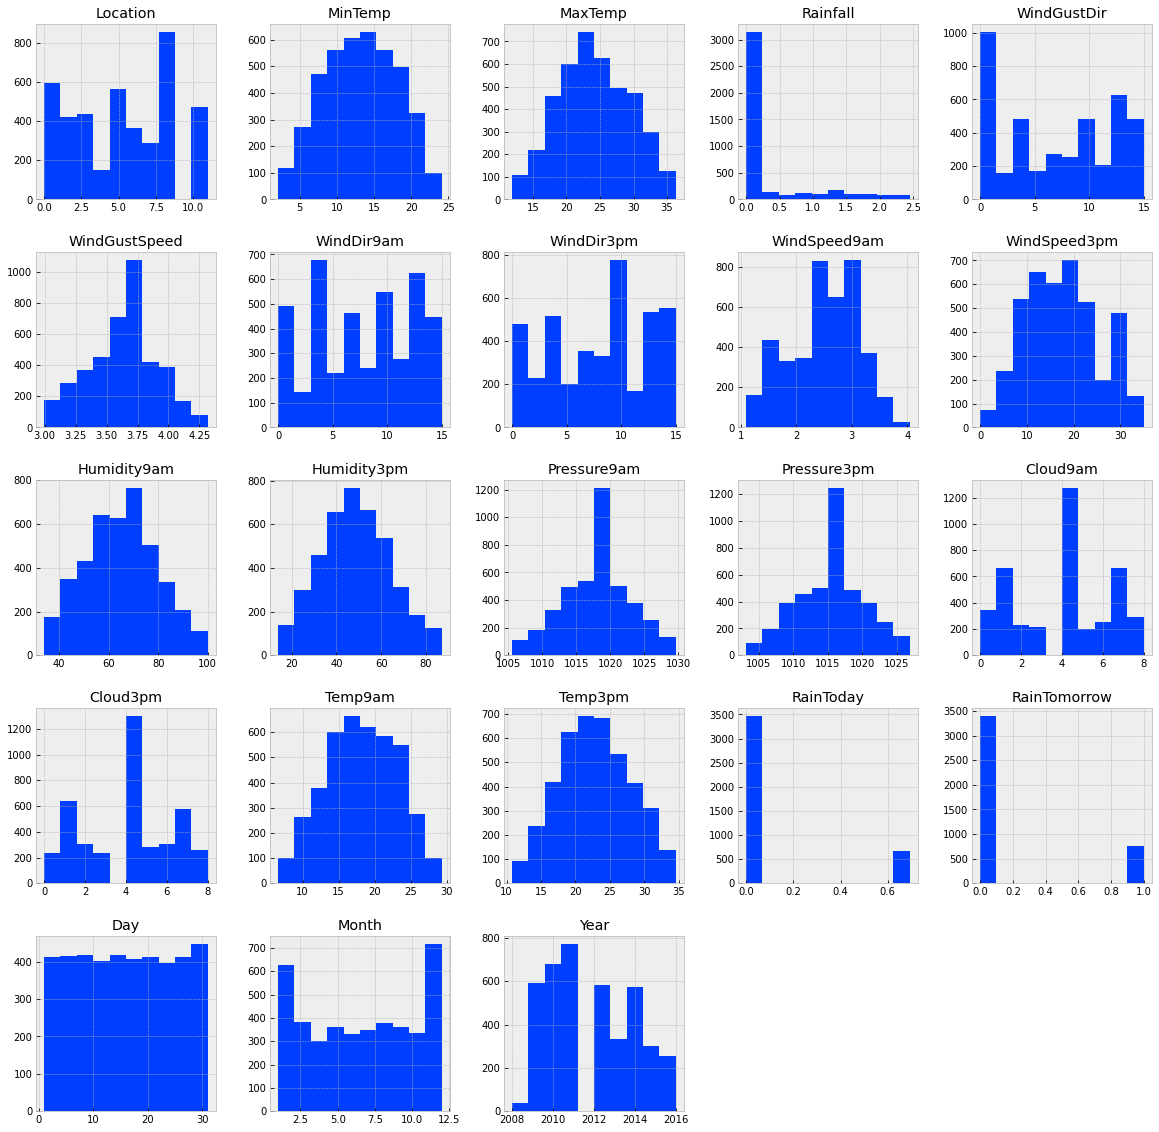

In [111]:
df_new_z.hist(figsize=(20,20))
plt.show()

we can see visually also that we have been able to remove skewness uptoo some extent

# Correlation

correlation with target column Rainfall

In [112]:
df.corr()['Rainfall'].sort_values()

Temp3pm         -0.238066
MaxTemp         -0.226783
Pressure9am     -0.135341
Temp9am         -0.083488
Pressure3pm     -0.057426
Day             -0.011044
Month            0.002260
Year             0.006475
Location         0.012262
WindSpeed3pm     0.030135
WindSpeed9am     0.035916
MinTemp          0.100526
WindDir3pm       0.102093
WindGustSpeed    0.106702
WindGustDir      0.113583
WindDir9am       0.161559
Cloud3pm         0.281357
Cloud9am         0.331700
RainTomorrow     0.356069
Humidity3pm      0.408308
Humidity9am      0.421672
RainToday        0.903874
Rainfall         1.000000
Name: Rainfall, dtype: float64

The only high corelation value we have is Rain today with a correlation value of 0.9

correlation with target column RainTomorrow

In [113]:
df.corr()['RainTomorrow'].sort_values()

Temp3pm         -0.202987
MaxTemp         -0.160318
Pressure9am     -0.159103
Pressure3pm     -0.131759
Temp9am         -0.025788
Year            -0.014769
Day             -0.007560
Location        -0.004506
Month           -0.003575
WindDir3pm       0.004301
WindDir9am       0.040399
WindSpeed3pm     0.043409
WindGustDir      0.045179
WindSpeed9am     0.049238
MinTemp          0.097146
WindGustSpeed    0.166335
Humidity9am      0.287774
Cloud9am         0.297967
RainToday        0.323691
Rainfall         0.356069
Cloud3pm         0.360511
Humidity3pm      0.466835
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

There are no high correlation values with target RainTomorrow

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

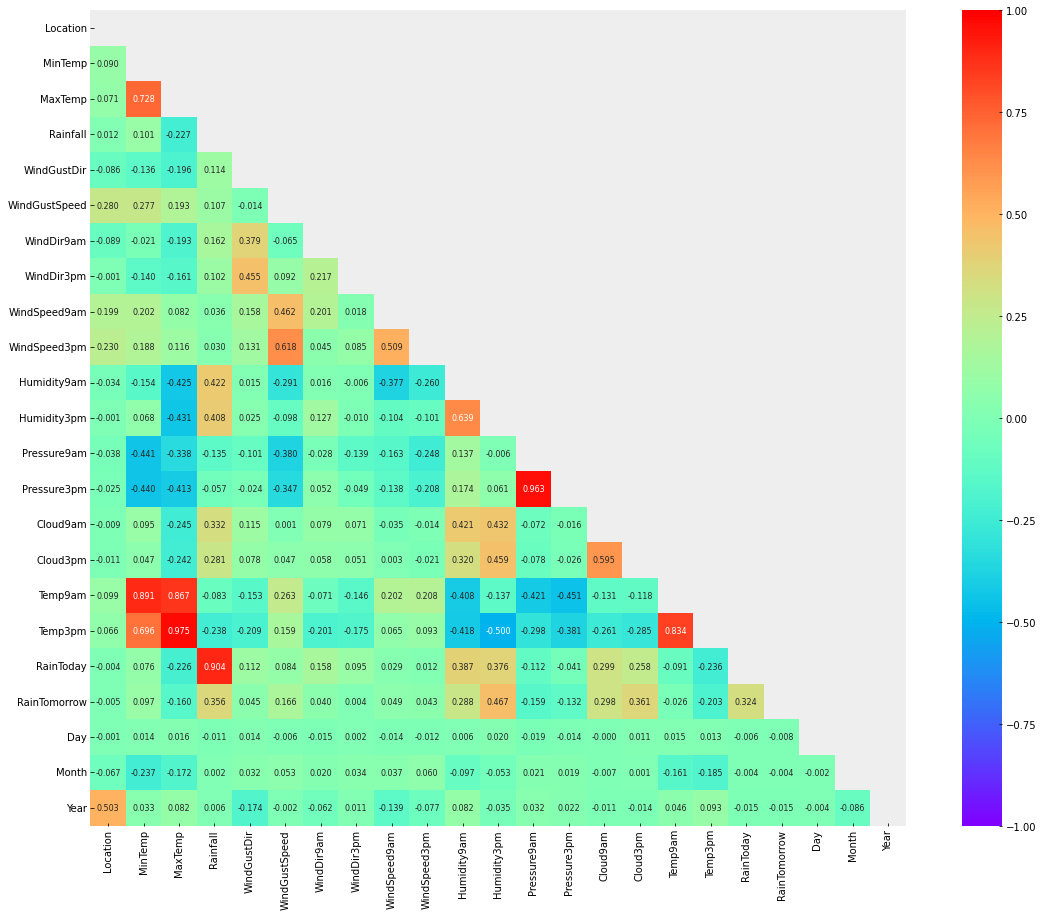

In [114]:
plt.style.use('bmh')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

we may have a problem of multicollinearity but i will retain these columns a it is important for prediction

# Bar Plot for all the columns with the Target Rainfall

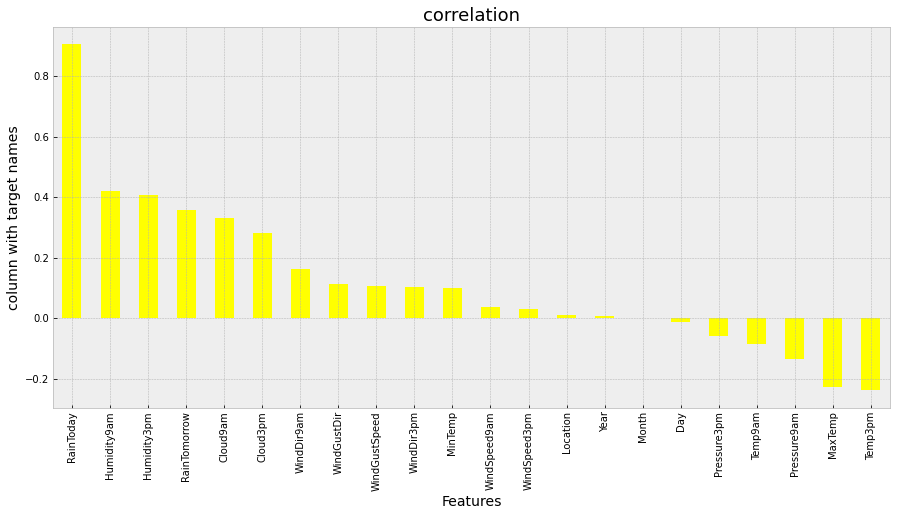

In [115]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(15,7))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='yellow')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see that most of our columns are positively correlated with our target variable

# Bar Plot for all the columns with the Target RainTomorrow

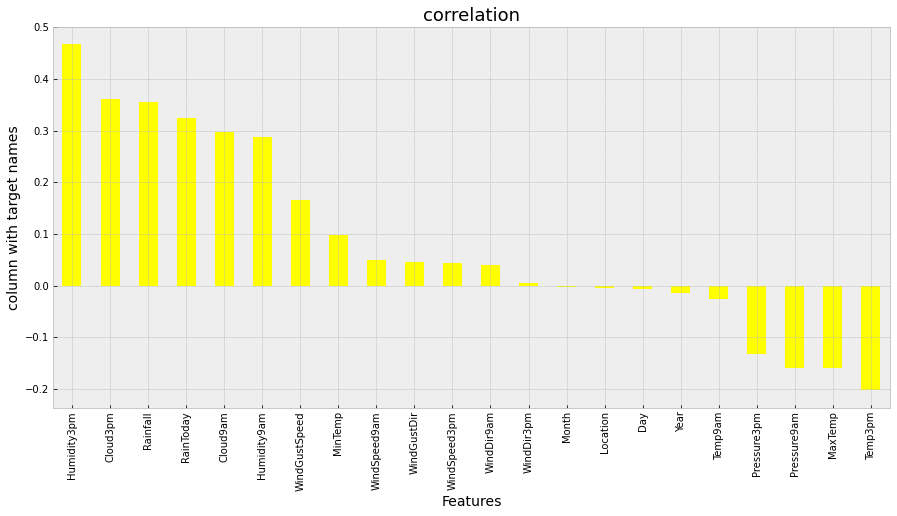

In [116]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(15,7))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='yellow')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see the columns that are negatively and positively correlated with our target RainTomorrow

# Regression Model with target variable Rainfall since it has continuous data

# Separating the columns into 'features' and 'targets' as 'x' and 'y'

In [117]:
x=df_new_z.drop('Rainfall',axis=1)
y=df_new_z['Rainfall']
print(x.shape)
print(y.shape)

(4139, 22)
(4139,)


# Principal Component Analysis(PCA)

In [101]:
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
x

array([[ 2.08657158e+01, -2.30790205e-01, -1.27621452e+01, ...,
         6.76997380e-01, -4.65683497e-01,  3.26285589e-01],
       [ 3.44035207e+01, -4.24651449e+00, -4.63418130e+00, ...,
        -5.79072311e-01, -9.04637600e-03, -7.01546024e-02],
       [ 3.81738981e+01,  9.00925858e+00, -3.40121960e+00, ...,
         1.21187448e-01, -1.55497311e-01,  1.33089418e-01],
       ...,
       [ 2.63694709e+01, -1.68524379e+01, -5.53466728e+00, ...,
        -3.05543533e-01,  1.53909928e-01, -1.07420095e-01],
       [ 2.69319066e+01, -2.07882588e+01, -6.76080341e-01, ...,
        -1.88401409e-01,  1.70301639e-01, -6.55770720e-03],
       [ 1.38186645e+01, -3.58279622e+00, -3.88806252e+00, ...,
         1.55094174e+00, -2.46638087e-01, -3.21513431e-02]])

# Feature Scaling

i scaling my data to avoid any biasness towards a column so that our data is standardized

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.92839793, -0.01568592, -1.20972241, ...,  0.85740494,
        -1.2477    ,  0.99618551],
       [ 1.53074822, -0.28861925, -0.43927356, ..., -0.73338461,
        -0.02423784, -0.21418966],
       [ 1.69850717,  0.61232464, -0.32240125, ...,  0.15348171,
        -0.41662201,  0.40633652],
       ...,
       [ 1.17328168, -1.14539536, -0.52463053, ..., -0.38696536,
         0.41236896, -0.32796527],
       [ 1.19830666, -1.41289796, -0.06408558, ..., -0.23860698,
         0.45628706, -0.0200214 ],
       [ 0.61484684, -0.24350887, -0.36854904, ...,  1.96423967,
        -0.66081436, -0.09816156]])

# Power Transform

In [103]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.93214126,  0.0333378 , -1.21139334, ...,  0.8677691 ,
        -1.38149366,  0.99441602],
       [ 1.49171462, -0.24618703, -0.43689006, ..., -0.73012447,
         0.09779493, -0.19348155],
       [ 1.64518651,  0.64246273, -0.31968358, ...,  0.19091076,
        -0.33253597,  0.4244751 ],
       ...,
       [ 1.1613784 , -1.17303604, -0.52254457, ..., -0.36132682,
         0.51929662, -0.30929771],
       [ 1.18466243, -1.47445814, -0.06096637, ..., -0.2066235 ,
         0.55896848,  0.00242789],
       [ 0.6345166 , -0.19936173, -0.36595283, ...,  1.87307866,
        -0.6230716 , -0.07613245]])

# Since our target value is continuous we will be using Regression Algorithms

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Finding the best Random State

In [118]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (r2_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 82.71221616785013 at Random State 615


# Linear Regression

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=615)

lr=LinearRegression()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.2598386548150419
R2 Score is: 82.71221616785013
Cross Validation Score: 77.082824208635
R2 Score - Cross Validation Score is 5.629391959215127


# Support Vector Regression

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=615)

svr=SVR()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.2598386548150419
R2 Score is: 82.71221616785013
Cross Validation Score: 77.082824208635
R2 Score - Cross Validation Score is 5.629391959215127


# RandomForestRegressor

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=615)

rfr=RandomForestRegressor()
# Training the model
rfr.fit(x_train,y_train)
    
# Predicting Y_test
pred = rfr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(rfr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.251320370457244
R2 Score is: 83.82712658150237
Cross Validation Score: 74.87512540638438
R2 Score - Cross Validation Score is 8.952001175117985


# Extreme Gradient Boosting

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=615)

xgbr=XGBRegressor()
# Training the model
xgbr.fit(x_train,y_train)
    
# Predicting Y_test
pred_xgbr = xgbr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(xgbr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.251320370457244
R2 Score is: 83.82712658150237
Cross Validation Score: 70.08713528674781
R2 Score - Cross Validation Score is 13.73999129475456


# Extra Trees Regressor

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=615)

etr=ExtraTreesRegressor()
# Training the model
etr.fit(x_train,y_train)
    
# Predicting Y_test
pred= etr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(etr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.2513519313762382
R2 Score is: 83.82306433380641
Cross Validation Score: 75.3007820518853
R2 Score - Cross Validation Score is 8.522282281921107


i have chosen the linear regression model for hyperparameter tuning as it is giving me a good accuracy as well as a decent difference bewteen the r2 score and cross validation score

# Hyperparamter tuning using GSCV on Linear Regression Model

In [54]:
fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

The parameters have been used after referring from sklearn

In [55]:
gcv = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [56]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [57]:
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': False}

In [127]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=False, positive=False)
Regressor= Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 82.71221616785013


my final model score 82.71%

# Linear Regression graph

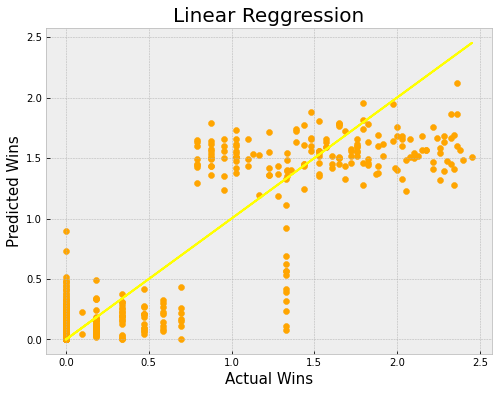

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='orange')
plt.plot(y_test,y_test,color='yellow')
plt.xlabel('Actual Wins',fontsize=15)
plt.ylabel('Predicted Wins',fontsize=15)
plt.title('Linear Reggression',fontsize=20)
plt.show()

we have a lot of outliers present in our data which are decreasing our accuracy but we need to retain as much data as possible

# Saving the best model

In [129]:
import pickle
filename='Rainfall_Prediction_Weather_Forecasting_E9.pkl'
pickle.dump(lr,open(filename,'wb'))

# Since our target variable RainTomorrow has categories Therefore we will be using Classification Algorithms

# splitting our data frame into target and features as 'x1' and 'y1'

In [61]:
x1=df_new_z.drop('RainTomorrow',axis=1)
y1=df_new_z['RainTomorrow']
print(x.shape)
print(y.shape)

(6075, 22)
(6075,)


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Applying Smote

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.470004,13.0,3.806662,13.0,14.0,3.044522,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0,1,12,2008
1,1.0,7.4,25.1,0.000000,14.0,3.806662,6.0,15.0,1.609438,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0,2,12,2008
2,1.0,12.9,25.7,0.000000,15.0,3.850148,13.0,15.0,2.995732,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0,3,12,2008
3,1.0,9.2,28.0,0.000000,4.0,3.218876,9.0,0.0,2.484907,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0,4,12,2008
4,1.0,17.5,32.3,0.693147,13.0,3.737670,1.0,7.0,2.079442,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,5,12,2008


In [64]:
y1.value_counts()

0.0    4754
1.0    1321
Name: RainTomorrow, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x1,y1=oversample.fit_resample(x1,y1)

In [67]:
y1.value_counts()

0.0    4754
1.0    4754
Name: RainTomorrow, dtype: int64

we have successfully balanced our data

# PCA

In [76]:
from sklearn.decomposition import PCA
pca=PCA()
x1=pca.fit_transform(x1)
x1

array([[ 2.77205146e+01,  6.06219181e-01,  1.79670959e+01, ...,
         7.39056237e-01, -9.08063203e-01, -3.44345006e-01],
       [ 4.07797884e+01, -2.71374578e+00,  3.35134414e+00, ...,
        -2.77858248e-01,  5.78043539e-01,  4.92071280e-02],
       [ 4.31115939e+01,  1.04951682e+01, -1.16282907e+00, ...,
         1.98713435e+00, -7.42997894e-02, -6.45398332e-02],
       ...,
       [-2.88919932e+01, -2.71255458e+00, -1.53765109e+01, ...,
         5.56524207e-01,  4.39417850e-01, -1.61228038e-01],
       [-5.03385615e+01, -7.38744046e-01,  2.29099225e+00, ...,
        -9.03357566e-02,  7.03496634e-01, -4.45638737e-01],
       [-9.68988883e+00, -1.39769420e+01, -8.39052219e+00, ...,
        -1.38904969e-01, -6.22428853e-03, -2.21468410e-01]])

# Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[ 1.2131712 ,  0.04005512,  1.66101737, ...,  0.82992124,
        -1.18072667, -1.22532331],
       [ 1.78470226, -0.1793071 ,  0.30982419, ..., -0.31202018,
         0.75161225,  0.17509951],
       [ 1.88675228,  0.69345412, -0.10750092, ...,  2.23144724,
        -0.09660973, -0.22965967],
       ...,
       [-1.26444024, -0.1792284 , -1.42152365, ...,  0.62494738,
         0.57136152, -0.57371668],
       [-2.20303606, -0.04881152,  0.21179705, ..., -0.1014423 ,
         0.91473505, -1.58576869],
       [-0.424072  , -0.92350765, -0.7756848 , ..., -0.15598297,
        -0.00809325, -0.78807707]])

# Power Transform

In [78]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')
x1

array([[ 1.19334217e+00,  8.99140688e-02,  1.65322401e+00, ...,
         8.33195832e-01, -1.16713541e+00, -1.53722124e+00],
       [ 1.69500267e+00, -1.32373703e-01,  3.14009058e-01, ...,
        -2.99801028e-01,  7.47433890e-01,  3.88557380e-01],
       [ 1.78288845e+00,  7.18569896e-01, -1.02817287e-01, ...,
         2.18289056e+00, -1.35412577e-01, -5.43947635e-02],
       ...,
       [-1.30858333e+00, -1.32292824e-01, -1.42650894e+00, ...,
         6.32735990e-01,  5.54326273e-01, -5.07564423e-01],
       [-2.40162103e+00,  6.41638799e-04,  2.16283242e-01, ...,
        -8.74564168e-02,  9.24284201e-01, -2.19428451e+00],
       [-3.85633916e-01, -9.26369300e-01, -7.74227827e-01, ...,
        -1.42303837e-01, -4.67664068e-02, -8.22614411e-01]])

# Finding the best random state

In [79]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 80.54679284963197 at Random State 589


# Logistic Regression

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=589)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.54679284963197

Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       959
         1.0       0.83      0.77      0.80       943

    accuracy                           0.81      1902
   macro avg       0.81      0.81      0.81      1902
weighted avg       0.81      0.81      0.81      1902

Cross Validation Score: 70.89994142216366

Accuracy Score - Cross Validation Score is 9.646851427468306


# Support vector classifier

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=589)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  87.64458464773922

Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       959
         1.0       0.87      0.88      0.88       943

    accuracy                           0.88      1902
   macro avg       0.88      0.88      0.88      1902
weighted avg       0.88      0.88      0.88      1902

Cross Validation Score: 71.96220263727486

Accuracy Score - Cross Validation Score is 15.682382010464366


# Decision Tree Classifier

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=589)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  81.59831756046268

Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       959
         1.0       0.81      0.82      0.82       943

    accuracy                           0.82      1902
   macro avg       0.82      0.82      0.82      1902
weighted avg       0.82      0.82      0.82      1902

Cross Validation Score: 72.38237553869207

Accuracy Score - Cross Validation Score is 9.215942021770601


# KNeighborsClassifier

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=589)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  85.2260778128286

Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       959
         1.0       0.79      0.95      0.86       943

    accuracy                           0.85      1902
   macro avg       0.87      0.85      0.85      1902
weighted avg       0.87      0.85      0.85      1902

Cross Validation Score: 68.0386879228432

Accuracy Score - Cross Validation Score is 17.18738988998541


# Random Forest Classifier

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=589)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  90.06309148264984

Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       959
         1.0       0.89      0.91      0.90       943

    accuracy                           0.90      1902
   macro avg       0.90      0.90      0.90      1902
weighted avg       0.90      0.90      0.90      1902

Cross Validation Score: 80.62828186614936

Accuracy Score - Cross Validation Score is 9.434809616500473


i will choose random forest classifier for hyperparameter tuning as it is giving me the best accuracy and the least value of accuracy score - cross val score in comparison to other models

# Hyperparameter tuning on Random Forest Classifier

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


i have chosen the above paramters after referring from the sklearn webpage

In [86]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [87]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [88]:
grid_search.best_score_

0.8524845641564885

In [90]:
Final_Model = RandomForestClassifier(bootstrap=True,max_features=3, max_depth=80, min_samples_leaf=3, 
                                     min_samples_split=8,n_estimators=1000)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 88.801261829653


The final accuracy for my best model is 88.80%

# AOC ROC Curve

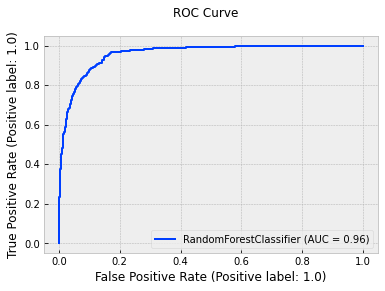

In [91]:
from sklearn import metrics
disp = metrics.plot_roc_curve(Final_Model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

The AUC ROC score for my model is 96%

# Confusion Matrix

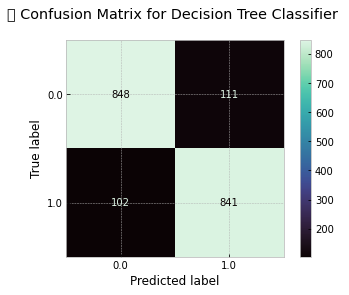

In [92]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

From the confusion matrix we can see that our TP=848,FP=111,FN=102,TN=841

that means that are 848 postive values were correctly classified

111 negative values were correctly classified

841 postive values were incorrectly classified

102 negative values were incorrectly classifed

# MODEL SAVING

In [93]:
import pickle
filename='Rainfall_Predcition_Weather_Forecasting_E9C.pkl'
pickle.dump(rf,open(filename,'wb'))